# **Practica 1**
#### _Alberto García Doménech - Pablo Daurell Marina_ (Grupo 10)
***

## Parte 2(Clasificacion)

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_breast_cancer

In [31]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.groupby(['target']).describe()

In [40]:
#Nombre y tipo de las variables en el conjunto de datos
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [23]:
#como vemos arriba, tenemos 30 variables, por lo que usamos el atributo corner para evitar pintar excesivas variables
sns.pairplot(df,corner=True)

TypeError: pairplot() got an unexpected keyword argument 'corners'

In [36]:
#cargamos el conjunto de datos sobre cancer de pecho
dataset = load_breast_cancer()

**No es necesario normalizar los datos antes de utilizar un arbol de decisión, ya que debido a su metodo voraz de disminucion de entropía en cada nodo encuentra la mejor manera de dividir cada variable y no una relacion entre ellas** 

In [71]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(dataset.data, dataset.target)

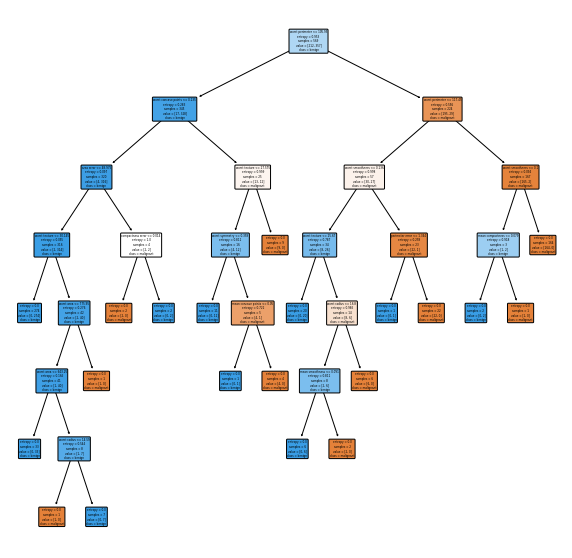

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vamos a mostrar el árbol de decisión generado usando plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names, rounded=True)
plt.savefig('./tree.pdf')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

#dividimos el conjunto de datos en un 30% para test y un 70% de entrenamiento
#por defecto ya esta estratificado (creo)
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3) 
#si quisiesemos obtnener los mismos resultados pondriamos la semilla del generador de num aleatorios con random_state =0

# Creamos y entrenamos el árbol de decisión
clf1 = DecisionTreeClassifier(criterion="entropy")
clf1 = clf1.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf1.score(X_train, y_train)
test_accuracy = clf1.score(X_test, y_test)
train_accuracy, test_accuracy

In [64]:
from sklearn.model_selection import cross_validate
import numpy as np

#analizamos los resultados de entrenamiento y de test respecto al parametro del arbol(recall= )
train_accuracy = []
test_accuracy = []

max_depths = range(1, 10)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, dataset.data, dataset.target, scoring='recall', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    

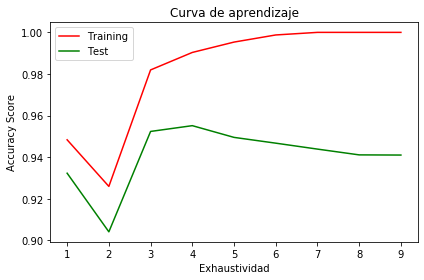

In [66]:
#dibujamos la curva de aprendizaje respecto al atributo seleccionado exhaustividad en este caso
import matplotlib.pyplot as plt

plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Exhaustividad"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

**Para max_depths=4, obtenemos el mejor valor para el conjunto de test. Desde ahi podemos observar conmo el conjunto de entrenamiento mejora mientras que el de test empeora por lo que comprobamos que sobreaprende y generaliza peor.**

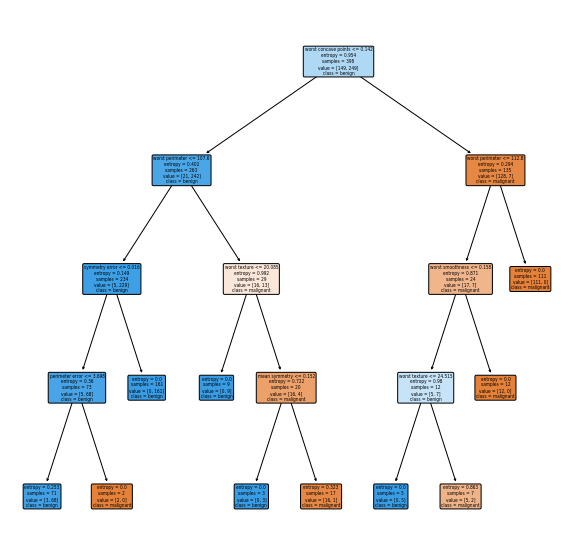

In [75]:
#Finalmente aplicamos lo que hemos aprendido para crear un arbol de clafisicacion optimo
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3,random_state= 0) 

# Creamos y entrenamos el árbol de decisión
clf1 = DecisionTreeClassifier(criterion="entropy",  max_depth =4)
clf1 = clf1.fit(X_train, y_train)

#dibujamos el arbol obtenido
plt.figure(figsize=(10,10))
plot_tree(clf1, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names, rounded=True)
plt.savefig('./tree_optimized.pdf')
plt.show()